##revised from MAGIC tutorial https://nbviewer.org/github/KrishnaswamyLab/magic/blob/master/python/tutorial_notebooks/bonemarrow_tutorial.ipynb
https://pubmed.ncbi.nlm.nih.gov/29961576/ 
https://github.com/KrishnaswamyLab/MAGIC 

In [1]:
!pip install --user magic-impute
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing MAGIC

Here, we'll import MAGIC along with other popular packages that will come in handy.

In [2]:
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib command for Jupyter notebooks only
%matplotlib inline

## Loading Data
Load your data using one of the following scprep.io methods: load_csv, load_tsv, load_fcs, load_mtx, load_10x. You can read about how to use them with help(scprep.io.load_csv) or on https://scprep.readthedocs.io/.

In [3]:
bmmsc_data = scprep.io.load_csv('https://github.com/KrishnaswamyLab/PHATE/raw/master/data/BMMC_myeloid.csv.gz')
bmmsc_data.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010B08Rik;Gm14434;Gm14308,...,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,mszf84;Gm14288;Gm14435;Gm8898,mt-Nd4,mt3-mmp;Mmp16,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
W31105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
W31106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
W31107,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
W31108,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
W31109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


## Data Preprocessing
Filtering your data
After loading your data, you're going to want to determine the molecule per cell and molecule per gene cutoffs with which to filter the data, in order to remove lowly expressed genes and cells with a small library size.

/root/.local/lib/python3.7/site-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


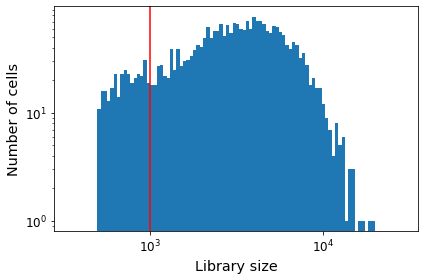

In [4]:
scprep.plot.plot_library_size(bmmsc_data, cutoff=1000)

In [5]:
bmmsc_data = scprep.filter.filter_library_size(bmmsc_data, cutoff=1000)
bmmsc_data.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010B08Rik;Gm14434;Gm14308,...,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,mszf84;Gm14288;Gm14435;Gm8898,mt-Nd4,mt3-mmp;Mmp16,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
W31106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
W31107,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
W31108,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
W31109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
W31110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0


We should also remove genes that are not expressed above a certain threshold, since they are not adding anything valuable to our analysis.

In [6]:
bmmsc_data = scprep.filter.filter_rare_genes(bmmsc_data, min_cells=10)
bmmsc_data.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik;mKIAA1841;Kiaa1841,0610010K14Rik;Rnasek,...,mKIAA1632;5430411K18Rik,mKIAA1994;Tsc22d1,mSox5L;Sox5,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
W31106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
W31107,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
W31108,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
W31109,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,8.0,...,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
W31110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0


# Normalizing your data
After filtering, the next steps are to perform library size normalization and transformation. Log transformation is frequently used for single-cell RNA-seq, however, this requires the addition of a pseudocount to avoid infinite values at zero. We instead use a square root transform, which has similar properties to the log transform but has no problem with zeroes.

In [10]:
bmmsc_data = scprep.normalize.library_size_normalize(bmmsc_data)
bmmsc_data = scprep.transform.sqrt(bmmsc_data)
bmmsc_data.head()

,0610007C21Rik;Apr3,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik;mKIAA1841;Kiaa1841,0610010K14Rik;Rnasek,...,mKIAA1632;5430411K18Rik,mKIAA1994;Tsc22d1,mSox5L;Sox5,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
W31106,0.0,0.000000,0.0000,1.575047,0.0,0.0,0.0000,0.000000,0.0,1.575047,...,0.0,0.000000,0.0,0.0,0.0,1.575047,1.575047,0.0,0.0,0.000000
W31107,0.0,1.136584,0.0000,1.607372,0.0,0.0,0.0000,0.000000,0.0,1.968621,...,0.0,1.607372,0.0,0.0,0.0,1.968621,1.136584,0.0,0.0,1.607372
W31108,0.0,1.189802,0.0000,1.189802,0.0,0.0,0.0000,0.000000,0.0,2.060797,...,0.0,0.000000,0.0,0.0,0.0,2.060797,1.189802,0.0,0.0,0.000000
W31109,0.0,0.000000,1.0744,0.000000,0.0,0.0,1.0744,1.860915,0.0,3.038861,...,0.0,2.402431,0.0,0.0,0.0,2.402431,0.000000,0.0,0.0,0.000000
W31110,0.0,2.058031,0.0000,0.000000,0.0,0.0,0.0000,2.058031,0.0,2.058031,...,0.0,0.000000,0.0,0.0,0.0,3.564615,0.000000,0.0,0.0,2.058031


# Running MAGIC
Now that your data has been preprocessed, you are ready to run MAGIC.

Creating the MAGIC operator

If you don't specify any parameters, the following line creates an operator with the following default values: `knn=5`, `decay=1`, `t=3`.

**knn** (int, optional, default: 5) – number of nearest neighbors from which to compute kernel bandwidth

**decay** (int, optional, default: 1) – sets decay rate of kernel tails. If None, alpha decaying kernel is not used

**t** (int, optional, default: 3) – power to which the diffusion operator is powered. This sets the level of diffusion. If ‘auto’, t is selected according to the Procrustes disparity of the diffused data

In [11]:
magic_op = magic.MAGIC()

# Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [12]:
bmmsc_magic = magic_op.fit_transform(bmmsc_data, genes=["Mpo", "Klf1", "Ifitm1"])
bmmsc_magic.head()

Calculating MAGIC...
  Running MAGIC on 2416 cells and 10782 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.00 seconds.
    Calculating affinities...
    Calculated affinities in 1.69 seconds.
  Calculated graph and diffusion operator in 14.76 seconds.
  Calculating imputation...
Calculated MAGIC in 14.93 seconds.


,Ifitm1,Klf1,Mpo
W31106,0.472940,0.237216,12.765543
W31107,0.047244,3.210329,3.056000
W31108,0.490379,0.345001,12.510057
W31109,0.038411,3.285281,2.840234
W31110,0.872125,0.291906,12.397224


# Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

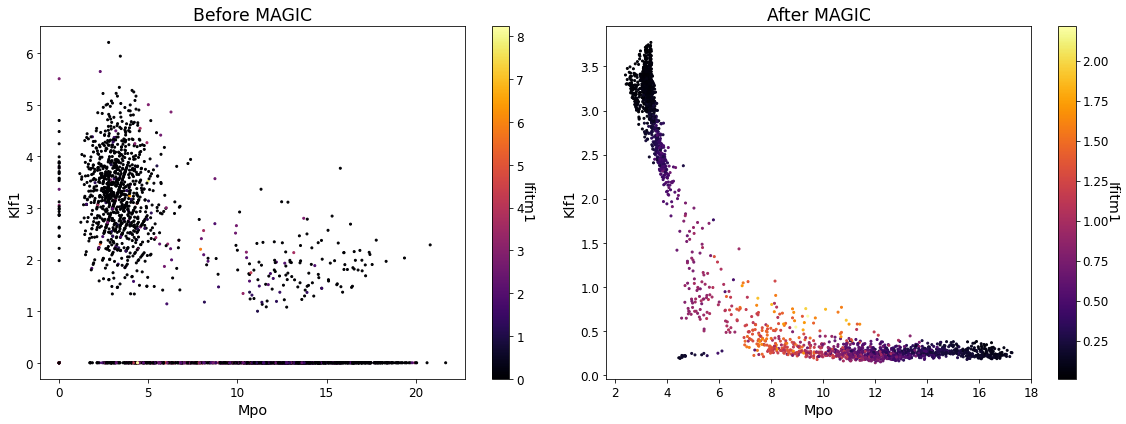

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=bmmsc_data['Mpo'], y=bmmsc_data['Klf1'], c=bmmsc_data['Ifitm1'],  ax=ax1,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='Before MAGIC')

scprep.plot.scatter(x=bmmsc_magic['Mpo'], y=bmmsc_magic['Klf1'], c=bmmsc_magic['Ifitm1'], ax=ax2,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='After MAGIC')

plt.tight_layout()
plt.show()

The original data suffers from dropout to the point that we cannot infer anything about the gene-gene relationships. As you can see, the gene-gene relationships are much clearer after MAGIC. These relationships also match the biological progression we expect to see - Ifitm1 is a stem cell marker, Klf1 is an erythroid marker, and Mpo is a myeloid marker.

# Setting the MAGIC operator parameters
If you wish to modify any parameters for your MAGIC operator, you change do so without having to recompute intermediate values using the magic_op.set_params method. Since our gene-gene relationship here appears a little too noisy, we can increase t a little from the default value of 3 up to a larger value like 5.

In [14]:
magic_op.set_params(t=5)

MAGIC(knn_max=15, t=5)

We can now run MAGIC on the data again with the new parameters. Given that we have already fitted our MAGIC operator to the data, we should run the magic_op.transform method.



In [15]:
bmmsc_magic = magic_op.transform(genes=["Mpo", "Klf1", "Ifitm1"])
bmmsc_magic.head()

Calculating imputation...


,Ifitm1,Klf1,Mpo
W31106,0.554732,0.236797,12.558651
W31107,0.054636,3.194620,3.049285
W31108,0.493119,0.332868,12.478166
W31109,0.046447,3.246861,2.889713
W31110,0.776882,0.314566,12.137337


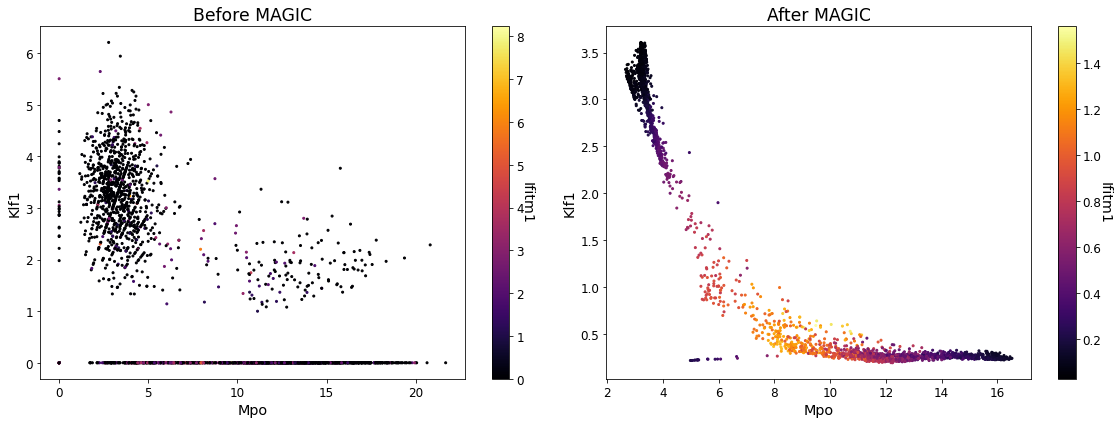

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=bmmsc_data['Mpo'], y=bmmsc_data['Klf1'], c=bmmsc_data['Ifitm1'],  ax=ax1,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='Before MAGIC')

scprep.plot.scatter(x=bmmsc_magic['Mpo'], y=bmmsc_magic['Klf1'], c=bmmsc_magic['Ifitm1'], ax=ax2,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='After MAGIC')

plt.tight_layout()
plt.show()

That looks better. The gene-gene relationships are restored without smoothing so far as to remove structure.